## Importing Libraries

In [245]:
from typing import List, Tuple
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
# Import dataframe
cervical_data = pd.read_csv('cervical_cancer_dataset.csv')
cervical_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [247]:
cervical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

# Data Preprocessing


In [248]:
# Replace '?' with NaN
cervical_data = cervical_data.replace('?', np.nan)

In [249]:
cervical_data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [250]:
# Drop the columns with too many missing values and
#the columns with a very low correlation with the target
cervical_data = cervical_data.drop(['STDs: Time since last diagnosis',
                   'STDs: Time since first diagnosis', 'STDs:AIDS',
                   'STDs:cervical condylomatosis', 'Smokes', 'IUD',
                   'Hormonal Contraceptives', 'Smokes (packs/year)'], axis=1)

cervical_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs,STDs (number),STDs:condylomatosis,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,37.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [251]:
# Convert the object type to numeric type
cervical_data = cervical_data.apply(pd.to_numeric)

In [252]:
# Replace null values with mean
cervical_data = cervical_data.fillna(cervical_data.mean())

In [253]:
# New check for null values
cervical_data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0
Dx                                    0
Hinselmann                            0


In [254]:
# substitute the Biopsy column with the "or" sum of the columns Biopsy Citology, Hinselmann and Schiller
cervical_data['Biopsy'] = np.logical_or.reduce([cervical_data['Biopsy'], cervical_data['Citology'], cervical_data['Hinselmann'], cervical_data['Schiller']]).astype(int)
#rename the column Biopsy with Target
cervical_data.rename(columns={'Biopsy': 'Target'}, inplace=True)


In [255]:
cervical_data = cervical_data.drop(['Citology', 'Hinselmann', 'Schiller'], axis=1)

In [256]:
cervical_data.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs,STDs (number),STDs:condylomatosis,...,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Target
853,34,3.0,18.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,8.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
856,33,2.0,24.0,2.0,0.0,0.08,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


DATA VISUALIZATION

---



In [257]:
# Count cervical data where 'Biopsy' = 1
cervical_data['Target'].value_counts()

0    756
1    102
Name: Target, dtype: int64

In [258]:
# correlation matrix about 'Target' column
cervical_data.corr()['Target']

Age                                   0.037868
Number of sexual partners            -0.009417
First sexual intercourse             -0.027775
Num of pregnancies                    0.049885
Smokes (years)                        0.071092
Hormonal Contraceptives (years)       0.088997
IUD (years)                           0.076808
STDs                                  0.110681
STDs (number)                         0.115448
STDs:condylomatosis                   0.103770
STDs:vaginal condylomatosis          -0.027249
STDs:vulvo-perineal condylomatosis    0.107030
STDs:syphilis                        -0.008021
STDs:pelvic inflammatory disease     -0.013597
STDs:genital herpes                   0.091956
STDs:molluscum contagiosum           -0.013597
STDs:HIV                              0.117805
STDs:Hepatitis B                     -0.013597
STDs:HPV                             -0.019242
STDs: Number of diagnosis             0.132007
Dx:Cancer                             0.172379
Dx:CIN       

<Axes: >

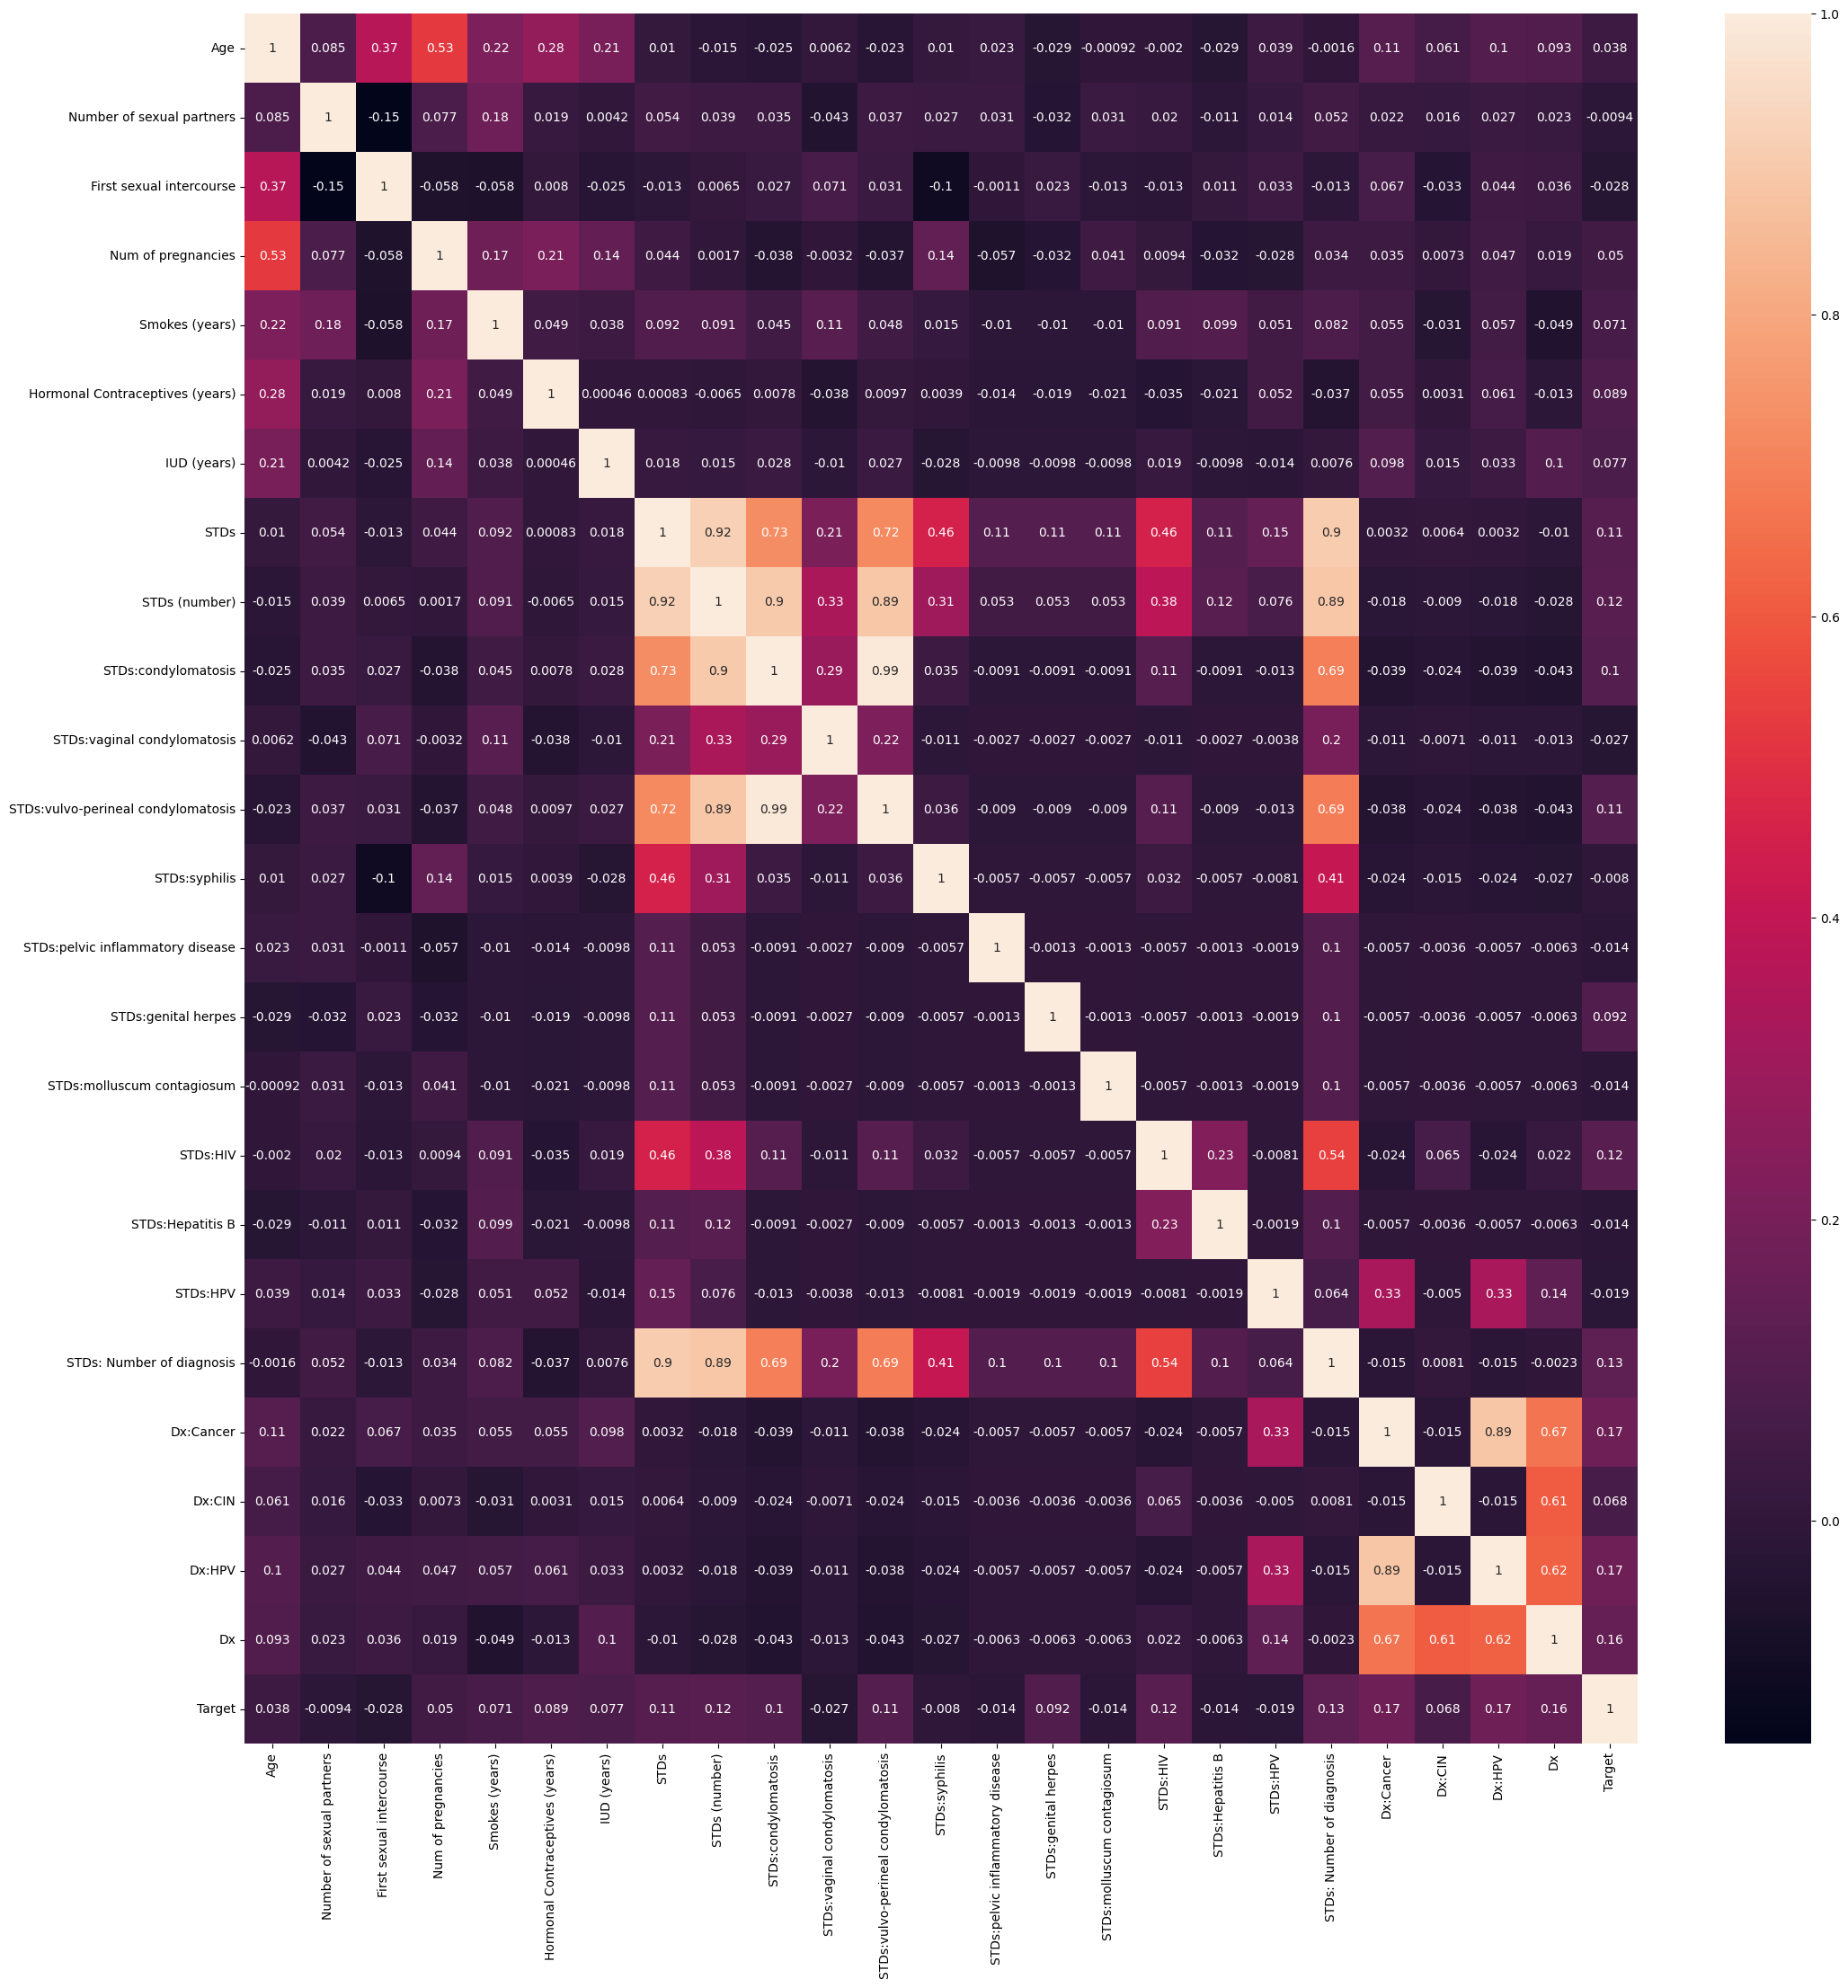

In [259]:
# plot correlation matrix
plt.figure(figsize=(25,25))
sns.heatmap(cervical_data.corr(), annot=True)

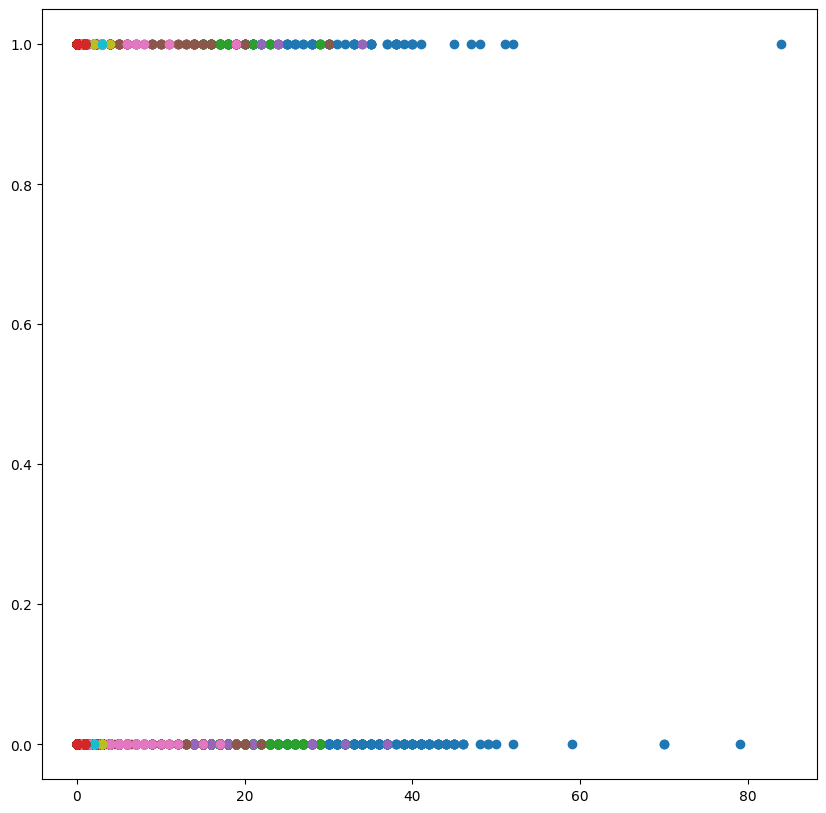

In [260]:
# scatter plot of 'Biopsy' and the features
plt.figure(figsize=(10,10))
for column in cervical_data:
    if column != 'Target':
        plt.scatter(cervical_data[column], cervical_data['Target'])

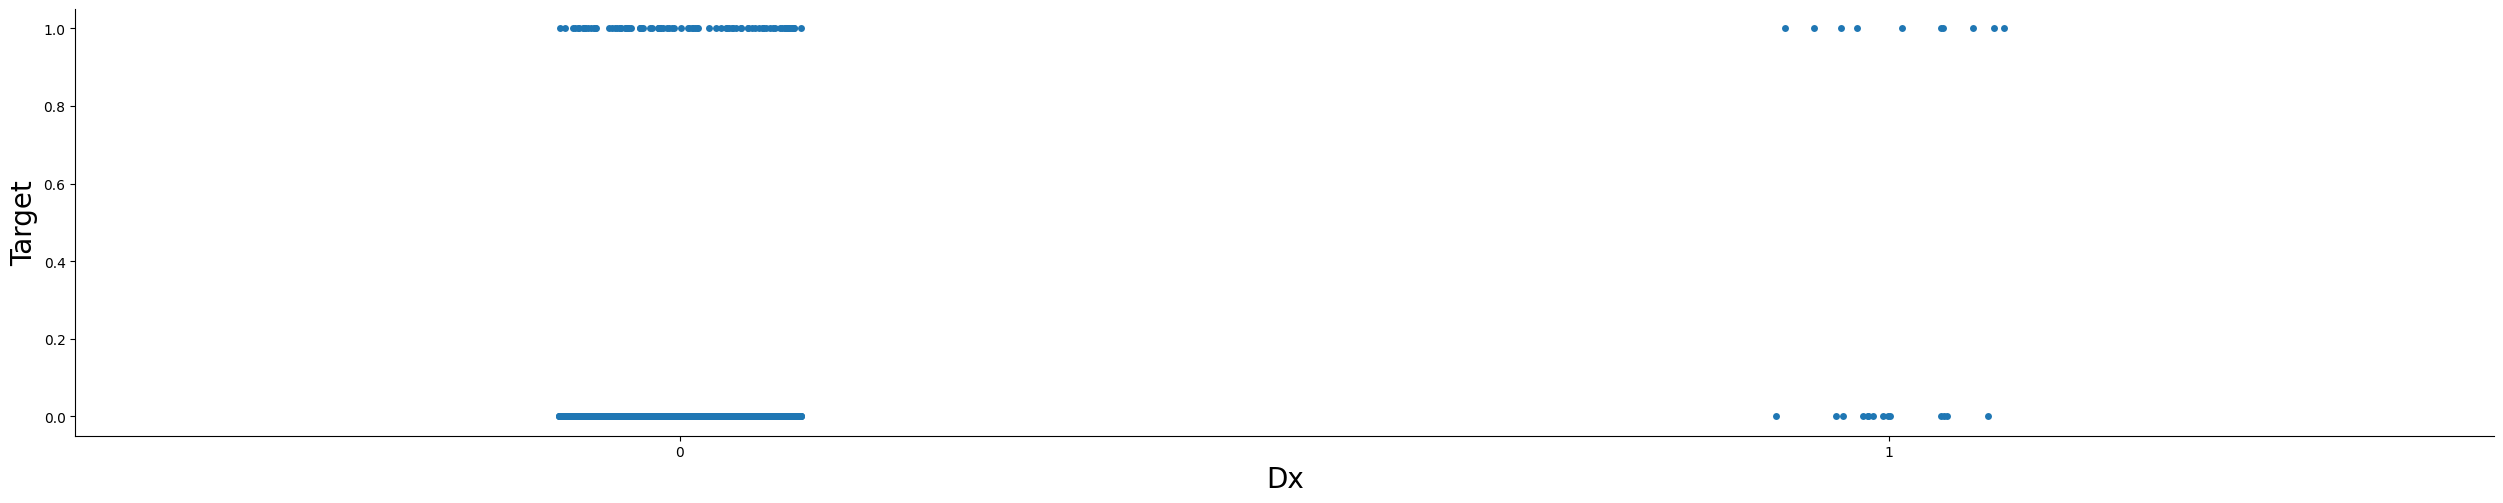

In [261]:
sns.catplot(y="Target", x="Dx", data=cervical_data, aspect = 5)
plt.xlabel("Dx",fontsize=20)
plt.ylabel("Target",fontsize=20)
plt.show()

PREPROCESSING


In [262]:
# Set up the X and y variables
X = cervical_data.drop(['Target'], axis=1)
y = cervical_data[['Target']]

In [263]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [264]:
# Scaling the data whit MinMaxScaler beacouse the data distribution
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [265]:
# Split the data into train, validate and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
print(X.shape)
print(y.shape)

(858, 24)
(858, 1)


# Trainingthe model

In [267]:
# Train the model
xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=20, n_estimators=100)

#xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=20, n_estimators=50)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [268]:
accuracy_train = xgb.score(X_train, y_train)
accuracy_train

0.9941690962099126

In [269]:
accuracy_test = xgb.score(X_test, y_test)
accuracy_test

0.872093023255814

In [270]:
y_hat = xgb.predict(X_test)
type(y_hat)

numpy.ndarray

In [271]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       152
         1.0       0.25      0.05      0.08        20

    accuracy                           0.87       172
   macro avg       0.57      0.52      0.51       172
weighted avg       0.81      0.87      0.83       172



In [272]:
cervical_1 = cervical_data[cervical_data['Target'] == 1]
cervical_1.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs,STDs (number),STDs:condylomatosis,...,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Target
6,51,3.0,17.0,6.000000,34.0,0.00,7.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
22,40,1.0,18.0,1.000000,0.0,0.25,0.000000,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,1
23,40,1.0,20.0,2.000000,0.0,15.00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,1,0,1
34,38,2.0,15.0,2.000000,0.0,0.50,19.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
41,37,2.0,18.0,2.275561,0.0,0.00,0.514804,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1,0,1,0,1,1


<Axes: >

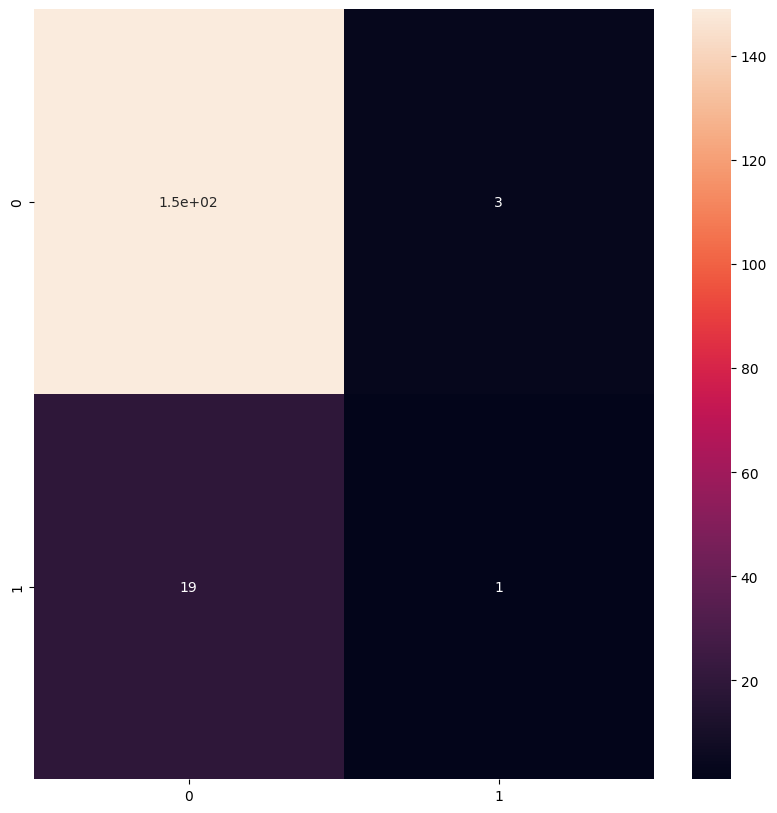

In [274]:
plt.figure(figsize=(10,10))

matrix = confusion_matrix(y_test, y_hat)
sns.heatmap(matrix, annot=True)